In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
# use only petal length and petal width as features
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
# Iris flower class names are already encoded as (0,1,2)
np.unique(y)

array([0, 1, 2])

In [4]:
# Split the dataset into train/test, test size of 30%
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# Standardize feature set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # esimates the sample mean and standard deviation for each feature
X_train_std = sc.transform(X_train) # standardized the training data useing sample mean and stDev
X_test_std = sc.transform(X_test) # standardize test set with same mean and standard deviation

In [6]:
# One-vs-Rest multiclass classification is supported out of the box
from sklearn.linear_model import Perceptron
# random_state parameter for reproducibility of the initial shuffling
# of the training dataset after each epoch
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0) # N-iter=epochs, eta=learn_rate
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


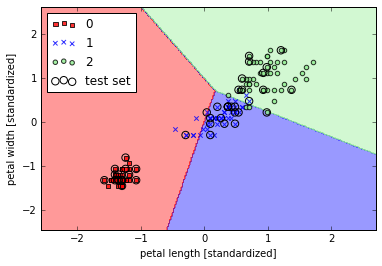

In [9]:
import matplotlib.pyplot as plt
from utils import plot_decision_regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

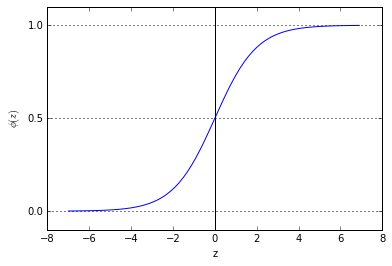

In [10]:
# plot the sigmoid function in range -7 to 7

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

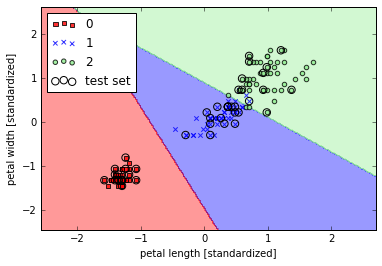

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [12]:
lr.predict_proba(X_test_std[0,:])

/Users/jones/anaconda3/envs/pyml/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

In [13]:
# Use Regularization to combat overfitting. Useful to handle high correlated features,
# filter noise and prevent overfitting
# e.g,: L2 regularization = L2 shrinkage = weight decay
# need to ensure features are on comparable scales to use regularization, hence need standardization

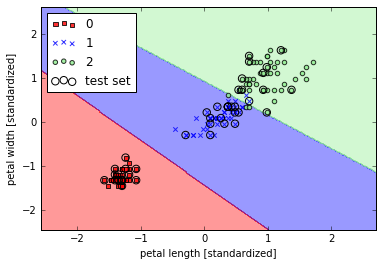

In [14]:
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [15]:
# kernel SVM => transform training data onto higher dimensional feature space via mapping function,
# then train a linear SVM on the new feature space
# useful when initial features are not linearly separable
# one of most popular kernels is the Radial Basis Function (RBF) = Gaussian kernel

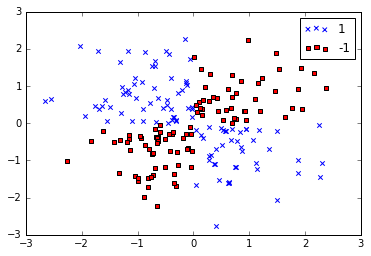

In [16]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

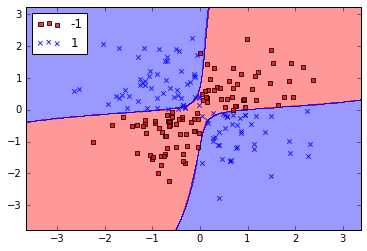

In [17]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

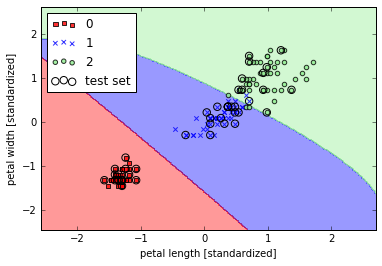

In [18]:
# low gamma does not over-fit the data
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

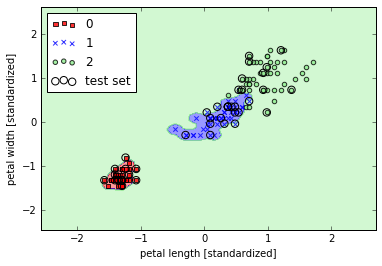

In [19]:
# high gamma can cause extreme overfitting
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

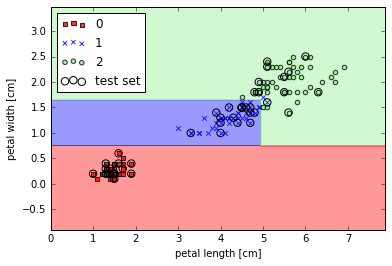

In [22]:
# Decision trees are helful for interpreting what is happening
# need to prune the treee to avoid overfitting
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

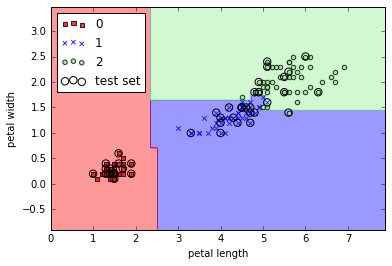

In [23]:
# Randome Forest => Ensemble of decision trees
# RF do not provide as much interpretability ad DT but don't have to worry
# about choosing good hyperparameters as much
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

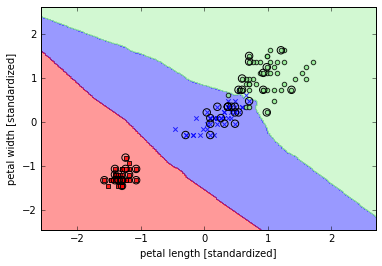

In [24]:
# k-nearest neighbor classifier (KNN)
# example of a lazy learner. Does not learn a discriminative function from
# data but memorizes the training dataset instead
# very susceptible to overfitting b/c of curse of dimensionality
from sklearn.neighbors import KNeighborsClassifier
# minkowski with p=2 => Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()